## **1 El Perceptrón como Modelo Matemático y su Implementación en Python mediante sklearn**

### **1.1 Fundamentes de la Técnica**

El Perceptrón es el algoritmo de clasificación lineal más simple y uno de los modelos de redes neuronales más antiguos, introducido por Frank Rosenblatt en 1957.

**Concepto Clave:**



*   **Clasificador Binario:** El Perceptrón es un clasificador lineal diseñado para separar datos en dos clases (problemas de clasificación binaria).

*   **Unidad Neuronal:** Simula una neurona biológica: recibe múltiples entradas, les aplica pesos, las suma y utiliza una función de activación para decidir si "disparar" o no (producir una salida de clase +1 o -1).

*   **Separabilidad Lineal:** Solo puede aprender a clasificar conjuntos de datos que son linealmente separables, es decir, aquellos donde una línea (o hiperplano en dimensiones superiores) puede dividir limpiamente las dos clases.




### **1.2 Modelo Matemático**

El Perceptrón realiza una clasificación en dos etapas: la agregación y la activación.
<br><br>

**Función de Agregación (Salida Neta)**

La salida neta ($z$) es la suma ponderada de las características de entrada ($\mathbf{x}$), más un término de sesgo o bias ($b$):

$$z = \sum_{i=1}^{n} w_i x_i + b = \mathbf{w} \cdot \mathbf{x} + b$$

Donde:$w_i$:

*   $w_i$: Peso asociado a la característica $x_i$.
*   $\mathbf{w}$: Vector de pesos.
*   $\mathbf{x}$: Vector de características de entrada.
*   $b$: Sesgo (intercepto).

<br>

**Función de Activación (Función de Paso/Escalón)**

La salida neta $z$ se pasa a través de una función de activación (generalmente la función de paso/escalón) para producir la salida binaria ($\hat{y}$):

$$\hat{y} = \phi(z) = \begin{cases} 1 & \text{si } z \geq 0 \\ -1 \text{ o } 0 & \text{si } z < 0 \end{cases}$$

<br>

**Regla de Aprendizaje (Actualización de Pesos)**

El modelo aprende ajustando los pesos y el sesgo para minimizar el error. Si la predicción $\hat{y}$ es incorrecta (es decir, $\hat{y} \neq y$, donde $y$ es la etiqueta real), los pesos se actualizan mediante:

$$\mathbf{w}_{nuevo} = \mathbf{w}_{anterior} + \alpha (y - \hat{y}) \mathbf{x}$$

Donde $\alpha$ es la tasa de aprendizaje (learning rate), un valor positivo que controla la magnitud del ajuste.

### **1.3 Librería scikit-learn**
Para la implementación del Perceptrón se utiliza la librería scikit-learn (alias sklearn).

| Componente | Descripción |
| :--- | :--- |
| `from sklearn.linear_model import Perceptron` | Importa la clase del modelo Perceptrón. |
| `Perceptron(random_state=None, eta0=1.0)` | Constructor de la clase. |
| `random_state` | Fija la semilla aleatoria para inicializar pesos (necesario para reproducibilidad). |
| `eta0` | La tasa de aprendizaje (learning rate), $\eta$. Por defecto es 1.0 (actualización de pesos agresiva). |
| `fit(X, y)` | El método de entrenamiento del modelo. Aprende los pesos $w$ y el sesgo $b$ a partir de los datos de entrada $X$ y las etiquetas verdaderas $y$. |
| `predict(X)` | El método de predicción. Utiliza los pesos aprendidos para clasificar nuevos datos de entrada $X$. |
| `max_iter` | Número máximo de iteraciones o épocas de entrenamiento. Evita que el modelo entrene indefinidamente si no converge. |
| `score(X, y)` | Devuelve directamente la precisión (accuracy) del modelo, equivalente a `accuracy_score(y, predict(X))`. |
| `from sklearn.metrics import accuracy_score` | Función para calcular la métrica de precisión (Accuracy). |

<br>

***Nota:***

Además de accuracy_score, sklearn.metrics ofrece otras métricas útiles como precision_score, recall_score y f1_score para evaluar modelos de clasificación más complejos.



### **1.4 Pipeline**

**Feature Engineering**

Para esta parte, usaremos el dataset **Iris** incluido en `scikit-learn`.
Dicho dataset solo tiene 4 variables numéricas. Además, se puede graficar fácilmente cómo el Perceptrón separa las clases y es linealmente separable si solo se usan 2 de las 3 clases.


In [18]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Cargar el dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Filtramos solo las dos primeras clases (linealmente separables)
df = df[df['target'].isin([0, 1])]

# Variables de entrada y salida
X = df[['sepal length (cm)', 'sepal width (cm)']].values
y = df['target'].values

print("Forma de X:", X.shape)
print("Valores de y:", np.unique(y))

Forma de X: (100, 2)
Valores de y: [0 1]


**Model Selection**

Se selecciona el **Perceptrón** como modelo base por ser un clasificador lineal binario.

El dataset reducido (solo *setosa* y *versicolor*) es linealmente separable, lo que hace al Perceptrón una opción apropiada.

In [19]:
from sklearn.linear_model import Perceptron

# Crear el modelo Perceptrón
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

**Model Training**

Entrenamos el modelo con el método `.fit(X, y)`.
Durante el entrenamiento, el Perceptrón ajusta sus pesos y sesgo en función de los errores cometidos, buscando una frontera lineal que separe las clases.


In [20]:
perceptron.fit(X, y)
print("Entrenamiento completado.")

Entrenamiento completado.


**Prediction**

Una vez entrenado, el modelo puede predecir la clase de nuevas observaciones mediante `.predict()`.

Aquí crearemos una función para probar manualmente diferentes combinaciones de largo y ancho del sépalo y observar qué clase predice.

In [21]:
# Predicciones sobre el conjunto de entrenamiento
y_pred = perceptron.predict(X)

# Función para probar una flor
def probar_flor(sepal_length, sepal_width):
    pred = perceptron.predict([[sepal_length, sepal_width]])[0]
    clase = "Iris setosa" if pred == 0 else "Iris versicolor"
    print(f"Entrada: ({sepal_length}, {sepal_width}) → Predicción: {clase}")

# Ejemplo de prueba
probar_flor(5.1, 3.5)
probar_flor(6.0, 2.2)

Entrada: (5.1, 3.5) → Predicción: Iris versicolor
Entrada: (6.0, 2.2) → Predicción: Iris versicolor


**Model Evaluation**

Evaluamos el modelo usando la métrica **Accuracy**, que representa el porcentaje de predicciones correctas.

También visualizamos la frontera de decisión para entender cómo el modelo separa las clases.

Precisión (Accuracy): 0.71


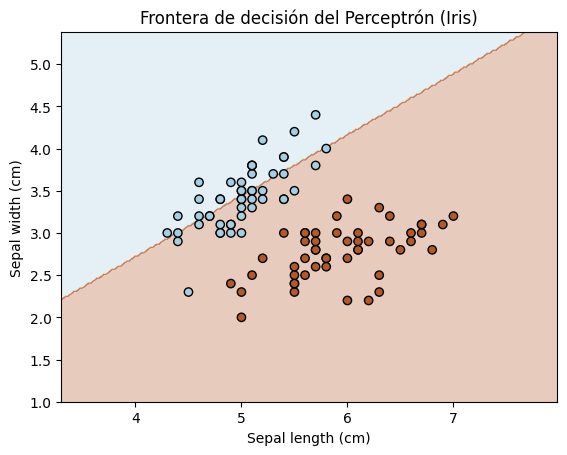

In [22]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Precisión del modelo
accuracy = accuracy_score(y, y_pred)
print(f"Precisión (Accuracy): {accuracy:.2f}")

# Visualizar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Frontera de decisión del Perceptrón (Iris)')
plt.show()


### **1.5 Fuentes Bibliográficas**

**Perceptrón: ¿qué es y para qué sirve?** (s.f.). DataScientest. https://datascientest.com/es/perceptron-que-es-y-para-que-sirve

**Perceptron**. (s.f.). scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

Rosenblatt, F. (1957). **The Perceptron**: A Probabilistic Model for Information Storage and Organization in the Brain. Cornell Aeronautical Laboratory, Psychological Review, Vol 65, 386-407.

Hecho por Luis Angel De La Cruz Ascencio